# Monte Carlo Integration
## February 15th, 2022
### Overview: Use Monte Carlo techniques to approximate the area within a region

In [1]:
import numpy as np
from scipy import stats
from numpy import linalg as la
from matplotlib import pyplot as plt

In [2]:
# Problem 1
def ball_volume(n, N=10000):
    """Estimate the volume of the n-dimensional unit ball.

    Parameters:
        n (int): The dimension of the ball. n=2 corresponds to the unit circle,
            n=3 corresponds to the unit sphere, and so on.
        N (int): The number of random points to sample.

    Returns:
        (float): An estimate for the volume of the n-dimensional unit ball.
    """
    #the total volume of the n-dimensional cube
    box_vol = 2**n
    
    #get N random points in the n-D domain [-1,1]x...x[-1,1]
    points = np.random.uniform(-1, 1, (n,N))
    
    #Determine how many points are within the n-D ball.
    lengths = la.norm(points, axis=0)
    num_within = np.count_nonzero(lengths < 1)
    
    #Estimate ball's volume
    ball = box_vol * (num_within / N)
    
    return ball

In [3]:
# Problem 2
def mc_integrate1d(f, a, b, N=10000):
    """Approximate the integral of f on the interval [a,b].

    Parameters:
        f (function): the function to integrate. Accepts and returns scalars.
        a (float): the lower bound of interval of integration.
        b (float): the lower bound of interval of integration.
        N (int): The number of random points to sample.

    Returns:
        (float): An approximation of the integral of f over [a,b].

    Example:
        >>> f = lambda x: x**2
        >>> mc_integrate1d(f, -4, 2)    # Integrate from -4 to 2.
        23.734810301138324              # The true value is 24.
    """
    #defining the points
    points = np.random.uniform(a, b, N)
    
    #applying f to the points, taking the mean, and multiplying by length of interval
    integral = (b-a)*np.mean(f(points))
    return integral

In [40]:
# Problem 3
def mc_integrate(f, mins, maxs, N=10000):
    """Approximate the integral of f over the box defined by mins and maxs.

    Parameters:
        f (function): The function to integrate. Accepts and returns
            1-D NumPy arrays of length n.
        mins (list): the lower bounds of integration.
        maxs (list): the upper bounds of integration.
        N (int): The number of random points to sample.

    Returns:
        (float): An approximation of the integral of f over the domain.

    Example:
        # Define f(x,y) = 3x - 4y + y^2. Inputs are grouped into an array.
        >>> f = lambda x: 3*x[0] - 4*x[1] + x[1]**2

        # Integrate over the box [1,3]x[-2,1].
        >>> mc_integrate(f, [1, -2], [3, 1])
        53.562651072181225              # The true value is 54.
    """
    #get N random points in the n-D domain [0,1]x...x[0,1]
    points = np.random.uniform(0, 1, (len(mins),N))
    
    #shifting points
    points = np.array([point*(maxs[i]-mins[i]) + mins[i] for i,point in enumerate(points)])
    
    #getting what volume is
    V = np.product([maxs[i] - mins[i] for i in range(len(maxs))])
    
    #applying f to the points; estimating integral
    return V * np.mean([f(point) for point in points.T])

In [41]:
g = lambda x: 3*x[0] - 4*x[1] + x[1]**2
mc_integrate(g, [1, -2], [3, 1])

53.99027625250305

In [46]:
# Problem 4
def prob4():
    """Let n=4 and Omega = [-3/2,3/4]x[0,1]x[0,1/2]x[0,1].
    - Define the joint distribution f of n standard normal random variables.
    - Use SciPy to integrate f over Omega.
    - Get 20 integer values of N that are roughly logarithmically spaced from
        10**1 to 10**5. For each value of N, use mc_integrate() to compute
        estimates of the integral of f over Omega with N samples. Compute the
        relative error of estimate.
    - Plot the relative error against the sample size N on a log-log scale.
        Also plot the line 1 / sqrt(N) for comparison.
    """
    #defining f 
    f = lambda x: 1/ ( (2 * np.pi)**2) * np.exp( - x.T@x /2  )
    
    #defining intervals
    Mins = [-3/2,0,0,0]
    Maxs = [3/4,1,1/2,1]
    
    # The distribution has mean 0 and covariance I (the nxn identity).
    means, cov = np.zeros(4), np.identity(4)
    #accurate integral value
    Int_real = stats.mvn.mvnun(Mins, Maxs, means, cov)[0]
    
    #init errors list
    errors = []
    
    #defining rough integer logspace
    space = np.array([round(point) for point in np.logspace(1,5,num=20)])

    #for each number of points to sample, get approx integral; record error
    for val in space:
        Int_apprx = mc_integrate(f,Mins,Maxs,N=val)
        errors.append(abs(Int_real - Int_apprx)/(Int_real))
    
    plt.title("monte carlo estimates' errors and 1/sqrt(N)")
    plt.loglog(space,errors,'b',label='relative error')
    plt.loglog(space,1/np.sqrt(space),'orange',label='1/sqrt(N)')
    plt.scatter(space,errors,color='b')
    plt.scatter(space,1/np.sqrt(space),color='orange')
    plt.legend()

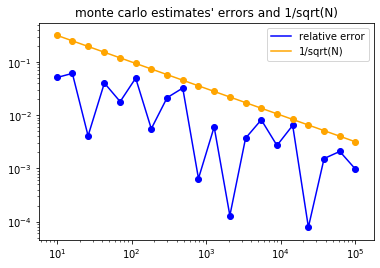

In [49]:
prob4()